<a href="https://colab.research.google.com/github/ricardoricrob76/machinelearning/blob/main/PCA_02_CIFAR10_identificando_as_figuras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CIFAR - 10 Exploração de Dados**

Em seguida, você explorará o conjunto de dados da imagemCIFAR - 10

Você pode carregar o conjunto de dados usando uma biblioteca de aprendizado profundo chamada .CIFAR - 10Keras

In [1]:
from keras.datasets import cifar10

Uma vez importado, você usará o método para baixar os dados, ele irá baixar e armazenar os dados em seu diretório. Isso pode levar algum tempo com base na sua velocidade de internet..load_data()Keras

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 2s 0us/step


A linha de código acima retorna imagens de treinamento e teste junto com os rótulos.

Vamos imprimir rapidamente a forma das imagens de treinamento e teste.

In [3]:
print('Traning data shape:', x_train.shape)
print('Testing data shape:', x_test.shape)


Traning data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)


In [7]:
y_train.shape,y_test.shape

((50000, 1), (10000, 1))

Vamos também descobrir o número total de rótulos e os vários tipos de classes que os dados têm.

In [8]:
import numpy as np

# Find the unique numbers from the train labels
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


Agora para plotar as imagens, você vai importar e também usar um comando para dizer ao notebook jupyter para mostrar a saída dentro do próprio notebook!CIFAR-10matplotlibmagic (%)%matplotlib inline

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline


Para uma melhor compreensão, vamos criar um dicionário que terá nomes de classe com seus rótulos de classe categóricos correspondentes.

In [10]:
label_dict = {
 0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck',
}


Text(0.5, 1.0, '(Label: frog)')
Text(0.5, 1.0, '(Label: cat)')


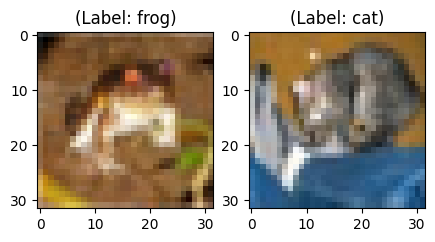

In [11]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img = np.reshape(x_train[0], (32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_train[0][0]]) + ")"))

# Display the first image in testing data
plt.subplot(122)
curr_img = np.reshape(x_test[0],(32,32,3))
plt.imshow(curr_img)
print(plt.title("(Label: " + str(label_dict[y_test[0][0]]) + ")"))


Visualizando o CIFAR - 10 dados
As seguintes linhas de código para visualizar os dados CIFAR-10 são bastante semelhantes à visualização PCA dos dados de câncer de mama.

Vamos verificar rapidamente os valores máximo e mínimo das imagens de treinamento CIFAR-10 e normalizar os pixels entre 0 e 1, inclusive.

In [12]:
np.min(x_train),np.max(x_train)


(0, 255)

In [13]:
x_train = x_train/255.0

In [14]:
np.min(x_train),np.max(x_train)

(0.0, 1.0)

In [15]:
x_train.shape

(50000, 32, 32, 3)

Em seguida, você criará um DataFrame que manterá os valores de pixel das imagens junto com seus respectivos rótulos em um formato de linha-coluna.

Mas antes disso, vamos remodelar as dimensões da imagem de três para uma (achatar as imagens).

In [16]:
x_train_flat = x_train.reshape(-1,3072)


In [17]:
feat_cols = ['pixel'+str(i) for i in range(x_train_flat.shape[1])]

In [19]:
import pandas as pd

df_cifar = pd.DataFrame(x_train_flat,columns=feat_cols)


In [20]:
df_cifar['label'] = y_train
print('Size of the dataframe: {}'.format(df_cifar.shape))


Size of the dataframe: (50000, 3073)


Perfeito! O tamanho do dataframe está correto, pois há 50.000 imagens de treinamento, cada uma com 3072 pixels e uma coluna adicional para rótulos, totalizando 3073.

A ACP será aplicada em todas as colunas, exceto na última, que é o rótulo de cada imagem.

In [21]:
df_cifar.head()


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel3063,pixel3064,pixel3065,pixel3066,pixel3067,pixel3068,pixel3069,pixel3070,pixel3071,label
0,0.231373,0.243137,0.247059,0.168627,0.180392,0.176471,0.196078,0.188235,0.168627,0.266667,...,0.847059,0.721569,0.549020,0.592157,0.462745,0.329412,0.482353,0.360784,0.282353,6
1,0.603922,0.694118,0.733333,0.494118,0.537255,0.533333,0.411765,0.407843,0.372549,0.400000,...,0.560784,0.521569,0.545098,0.560784,0.525490,0.556863,0.560784,0.521569,0.564706,9
2,1.000000,1.000000,1.000000,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.305882,0.333333,0.325490,0.309804,0.333333,0.325490,0.313725,0.337255,0.329412,9
3,0.109804,0.098039,0.039216,0.145098,0.133333,0.074510,0.149020,0.137255,0.078431,0.164706,...,0.211765,0.184314,0.109804,0.247059,0.219608,0.145098,0.282353,0.254902,0.180392,4
4,0.666667,0.705882,0.776471,0.658824,0.698039,0.768627,0.694118,0.725490,0.796078,0.717647,...,0.294118,0.309804,0.321569,0.278431,0.294118,0.305882,0.286275,0.301961,0.313725,1


In [28]:
from sklearn.decomposition import PCA

Em seguida, você criará o método PCA e passará o número de componentes como dois e aplicará nos dados de treinamento, isso pode levar alguns segundos, já que há 50.000 amostrasfit_transform

In [29]:
pca_cifar = PCA(n_components=2)
principalComponents_cifar = pca_cifar.fit_transform(df_cifar.iloc[:,:-1])


In [30]:
principal_cifar_Df = pd.DataFrame(data = principalComponents_cifar
             , columns = ['principal component 1', 'principal component 2'])
principal_cifar_Df['y'] = y_train


In [31]:
principal_cifar_Df.head()


,principal component 1,principal component 2,y
0,-6.401018,2.729039,6
1,0.829783,-0.949943,9
2,7.730200,-11.522102,9
3,-10.347817,0.010738,4
4,-2.625651,-4.969240,1


In [32]:
print('Explained variation per principal component: {}'.format(pca_cifar.explained_variance_ratio_))


Explained variation per principal component: [0.2907663  0.11253144]


Bem, parece que uma quantidade razoável de informações foi retida pelos componentes principais 1 e 2, dado que os dados foram projetados de 3072 dimensões para apenas dois componentes principais.

É hora de visualizar os dados do CIFAR-10 em um espaço bidimensional. Lembre-se de que há alguma sobreposição de classe semântica neste conjunto de dados, o que significa que um sapo pode ter uma forma ligeiramente semelhante a um gato ou um veado com um cão; especialmente quando projetado em um espaço bidimensional. As diferenças entre eles podem não ser captadas tão bem.

<Axes: xlabel='principal component 1', ylabel='principal component 2'>

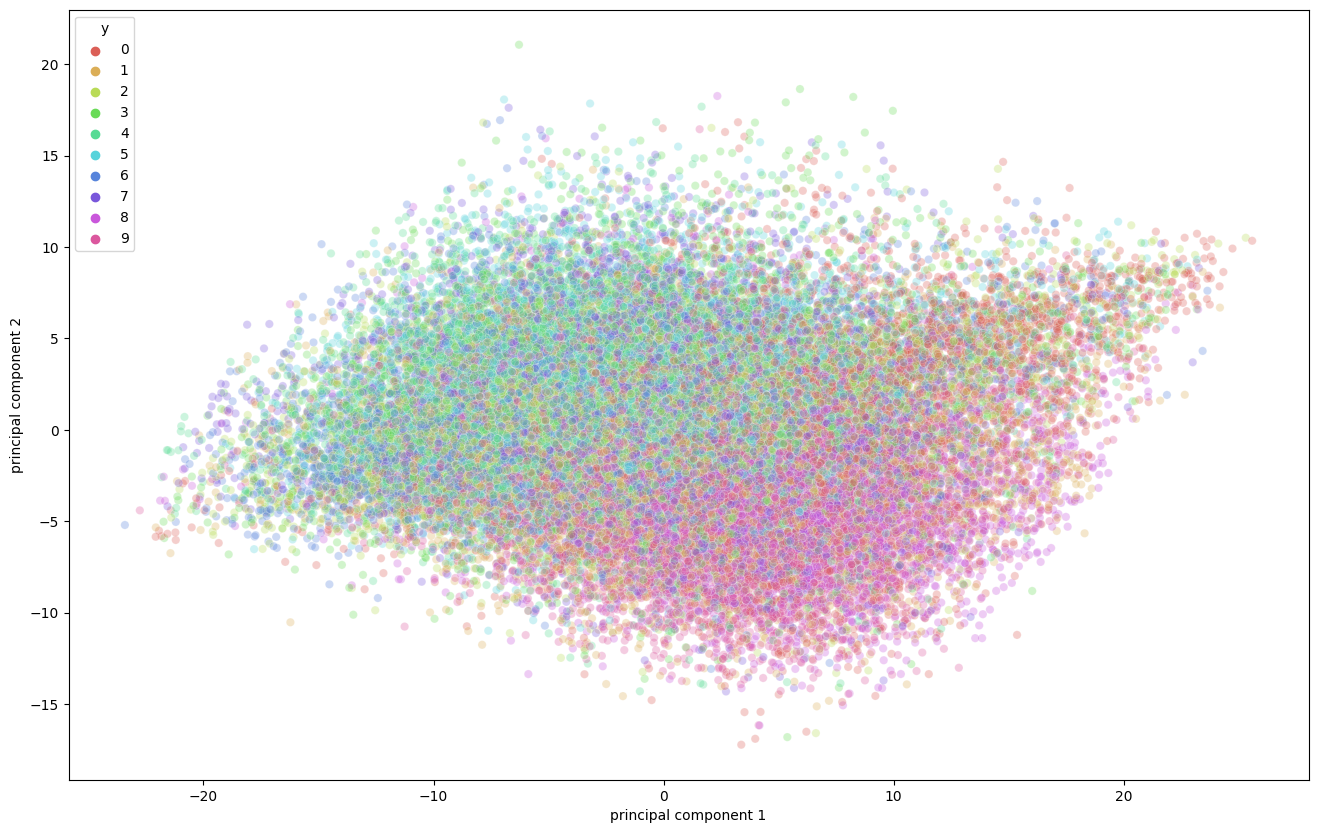

In [34]:
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_cifar_Df,
    legend="full",
    alpha=0.3
)